In [1]:
import linkpred
from linkpred.evaluation import Pair
import networkx as nx
import random
import itertools
from operator import itemgetter
import pickle
import matplotlib.pyplot as plt

In [2]:
path = "../DataSet StackOverflow/"

In [3]:
path_graph = "../DataSet StackOverflow/Graph_data/"

In [4]:
saved_path = "../DataSet StackOverflow/LinkPrediction_task/1057/"

In [5]:
G = nx.read_graphml(path_graph+"Real_Network.graphml")

In [6]:
nx.info(G)

'Name: \nType: Graph\nNumber of nodes: 13780\nNumber of edges: 97892\nAverage degree:  14.2078'

# 1) Set preparation

In [7]:
degree_dict = dict(G.degree(G.nodes()))
nx.set_node_attributes(G, degree_dict, 'degree')
sorted_degree = sorted(degree_dict.items(), key = itemgetter(1), reverse = True)

In [8]:
sample_nodes = []
for i in sorted_degree:
    if i[1] > 30:
        sample_nodes.append(i[0])
print(len(sample_nodes))

1057


In [9]:
new_graph = G.subgraph(sample_nodes)

print(len(new_graph.nodes()))
print(len(new_graph.edges()))

training_edge_len = len(new_graph.edges()) - int(len(new_graph.edges())/100 * 20)
test_edge_len = len(new_graph.edges()) - training_edge_len

1057
28301


In [10]:
print(training_edge_len)
print(test_edge_len)

22641
5660


In [11]:
training_edges = random.sample(new_graph.edges, training_edge_len)

In [12]:
training_edges

[('postgresql', 'locking'),
 ('azure-sql-database', 'encryption'),
 ('node.js', 'swift'),
 ('struct', 'c++20'),
 ('docker', 'gitlab-ci'),
 ('directory', 'python'),
 ('boto3', 'operating-system'),
 ('kubernetes-ingress', 'oauth-2.0'),
 ('antd', 'icons'),
 ('github', 'ios'),
 ('polymorphism', 'c#'),
 ('stripe-payments', 'flutter'),
 ('v8', 'optimization'),
 ('nginx', 'internationalization'),
 ('c', 'security'),
 ('single-page-application', 'service-worker'),
 ('apple-sign-in', 'ios'),
 ('timezone', 'sql-server'),
 ('django-rest-framework', 'web-applications'),
 ('node.js', 'browser'),
 ('reactjs', 'cpu'),
 ('math', 'binary'),
 ('filter', 'frontend'),
 ('tailwind-css', 'django'),
 ('swift', 'warnings'),
 ('google-colaboratory', 'linux'),
 ('docker-compose', 'selenium-webdriver'),
 ('nunit', 'selenium'),
 ('bit-manipulation', 'operators'),
 ('c++', 'switch-statement'),
 ('firebase-realtime-database', 'swift'),
 ('time', 'python-3.x'),
 ('windows-subsystem-for-linux', 'gradle'),
 ('template

2) Create training and test set

In [13]:
training = new_graph.edge_subgraph(training_edges)

In [14]:
print(nx.info(training))

Graph with 1057 nodes and 22641 edges


In [15]:
test = new_graph.copy()
test.remove_edges_from(training.edges())

In [16]:
print(nx.info(test))

Graph with 1057 nodes and 5660 edges


4) Create node set

In [17]:
nodes = list(new_graph.nodes())
nodes.extend(list(test.nodes()))

5) Compute pair test set and universe set

In [18]:
test = [Pair(i) for i in test.edges()]
universe = set([Pair(i) for i in itertools.product(nodes, nodes) if i[0]!=i[1]])

In [19]:
print(len(universe))

558096


6) Storage file

In [20]:
universe

{Pair('mvvm', 'interface'),
 Pair('tcp', 'pyinstaller'),
 Pair('uuid', 'laravel-mix'),
 Pair('wordpress', 'quarkus'),
 Pair('xcode', 'ada'),
 Pair('posix', '.net'),
 Pair('encryption', 'arduino'),
 Pair('ide', 'html'),
 Pair('widget', 'awk'),
 Pair('wordpress', 'padding'),
 Pair('tomcat9', 'stripe-payments'),
 Pair('deprecated', 'blazor-webassembly'),
 Pair('tags', 'dictionary'),
 Pair('twitter', 'google-maps'),
 Pair('python-2.7', 'java'),
 Pair('python-imaging-library', 'python-2.7'),
 Pair('metaprogramming', 'configuration'),
 Pair('reinforcement-learning', 'android-camera'),
 Pair('woocommerce', 'istio'),
 Pair('google-authentication', 'dependencies'),
 Pair('tkinter', 'statistics'),
 Pair('redis', 'ffmpeg'),
 Pair('makefile', 'keras'),
 Pair('gatsby', 'datepicker'),
 Pair('twitter-bootstrap', 'spring-data'),
 Pair('nvidia', 'aws-cdk'),
 Pair('vuetify.js', 'encryption'),
 Pair('visual-studio-2019', 'struct'),
 Pair('qml', 'image'),
 Pair('spring-cloud', 'c++'),
 Pair('prometheus', 

In [21]:
with open(saved_path+'universe_1057.pickle', 'wb') as f:
    pickle.dump(universe, f)
with open(saved_path+'test_1057.pickle', 'wb') as f:
    pickle.dump(test, f) 
nx.write_graphml(training, saved_path+"training_1057.graphml")

# 2) Prediction

1) Read data

In [22]:
with open(saved_path+'universe_1057.pickle', 'rb') as f:
    universe = pickle.load(f)
with open(saved_path+'test_1057.pickle', 'rb') as f:
    test = pickle.load(f)
training = nx.read_graphml(saved_path+"training_1057.graphml")

2) Predictions

In [23]:
cn = linkpred.predictors.CommonNeighbours(training, excluded=training.edges())
cn_results = cn.predict()

In [24]:
aa = linkpred.predictors.AdamicAdar(training, excluded=training.edges())
aa_results = aa.predict()

In [25]:
jc = linkpred.predictors.Jaccard(training, excluded=training.edges())
jc_results = jc.predict()

In [26]:
kz = linkpred.predictors.Katz(training, excluded=training.edges())
kz_results = kz.predict()

Computing matrix powers: [############################################################] 5/5


In [27]:
simrank = linkpred.predictors.SimRank(training, excluded=training.edges())
simrank_results = simrank.predict()

3) Saved predictions

In [28]:
res = []
for i, j in zip(cn_results, cn_results.values()):
    res.append([Pair(i), j])
with open(saved_path+'cn_results_1057.pickle', 'wb') as f:
    pickle.dump(res, f)

In [29]:
res = []
for i, j in zip(aa_results, aa_results.values()):
    res.append([Pair(i), j])
with open(saved_path+'aa_results_1057.pickle', 'wb') as f:
    pickle.dump(res, f)

In [30]:
res = []
for i, j in zip(jc_results, jc_results.values()):
    res.append([Pair(i), j])
with open(saved_path+'jc_results_1057.pickle', 'wb') as f:
    pickle.dump(res, f)

In [31]:
res = []
for i, j in zip(kz_results, kz_results.values()):
    res.append([Pair(i), j])
with open(saved_path+'kz_results_1057.pickle', 'wb') as f:
    pickle.dump(res, f)

In [32]:
res = []
for i, j in zip(simrank_results, simrank_results.values()):
    res.append([Pair(i), j])
with open(saved_path+'simrank_results.pickle', 'wb') as f:
    pickle.dump(res, f)

3) Evaluation

In [33]:
cn_evaluation = linkpred.evaluation.EvaluationSheet(cn_results, test, universe)

In [34]:
with open(saved_path+'cn_evaluation_1057.pickle', 'wb') as f:
    pickle.dump(cn_evaluation, f) 

In [35]:
aa_evaluation = linkpred.evaluation.EvaluationSheet(aa_results, test, universe)

In [36]:
with open(saved_path+'aa_evaluation_1057.pickle', 'wb') as f:
    pickle.dump(aa_evaluation, f) 

In [37]:
jc_evaluation = linkpred.evaluation.EvaluationSheet(jc_results, test, universe)

In [38]:
with open(saved_path+'jc_evaluation_1057.pickle', 'wb') as f:
    pickle.dump(jc_evaluation, f) 

In [39]:
kz_evaluation = linkpred.evaluation.EvaluationSheet(kz_results, test, universe)

In [40]:
with open(saved_path+'kz_evaluation_1057.pickle', 'wb') as f:
    pickle.dump(kz_evaluation, f) 

In [41]:
simrank_evaluation = linkpred.evaluation.EvaluationSheet(simrank_results, test, universe)

In [42]:
with open(saved_path+'simrank_evaluation_1057.pickle', 'wb') as f:
    pickle.dump(simrank_evaluation, f) 

# 3) Result Analysis

In [7]:
with open(saved_path+'aa_evaluation_1057.pickle', 'rb') as f:
    aa_evaluation = pickle.load(f)
with open(saved_path+'aa_results_1057.pickle', 'rb') as f:
    aa_results = pickle.load(f)
    
with open(saved_path+'cn_evaluation_1057.pickle', 'rb') as f:
    cn_evaluation = pickle.load(f)
with open(saved_path+'cn_results_1057.pickle', 'rb') as f:
    cn_results = pickle.load(f)

with open(saved_path+'jc_evaluation_1057.pickle', 'rb') as f:
    jc_evaluation = pickle.load(f)
with open(saved_path+'jc_results_1057.pickle', 'rb') as f:
    jc_results = pickle.load(f)

with open(saved_path+'kz_evaluation_1057.pickle', 'rb') as f:
    kz_evaluation = pickle.load(f)
with open(saved_path+'kz_results_1057.pickle', 'rb') as f:
    kz_results = pickle.load(f)

with open(saved_path+'simrank_evaluation_1057.pickle', 'rb') as f:
    sm_evaluation = pickle.load(f)
with open(saved_path+'simrank_results_1057.pickle', 'rb') as f:
    sm_results = pickle.load(f)

In [45]:
def print_res(res):
    res=sorted(res,key=lambda x: x[1],reverse=True)
    for i in res[:10]:
        print(i)

In [46]:
print_res(aa_results)
print("")
print("")
print("")
print_res(cn_results)
print("")
print("")
print("")
print_res(jc_results)
print("")
print("")
print("")
print_res(kz_results)
print("")
print("")
print("")
print_res(sm_results)

[Pair('python', 'java'), 67.99409268051602]
[Pair('reactjs', 'javascript'), 62.14973907299267]
[Pair('javascript', 'java'), 58.98646285558952]
[Pair('python', 'node.js'), 53.05748939953368]
[Pair('javascript', 'flutter'), 45.7143135275699]
[Pair('typescript', 'node.js'), 42.105335038598085]
[Pair('typescript', 'reactjs'), 37.013081442025836]
[Pair('reactjs', 'java'), 36.83600024260915]
[Pair('php', 'javascript'), 36.03347358097732]
[Pair('python', 'php'), 35.45479753697239]



[Pair('python', 'java'), 253.0]
[Pair('reactjs', 'javascript'), 227.0]
[Pair('javascript', 'java'), 223.0]
[Pair('python', 'node.js'), 201.0]
[Pair('javascript', 'flutter'), 173.0]
[Pair('typescript', 'node.js'), 159.0]
[Pair('reactjs', 'java'), 145.0]
[Pair('typescript', 'reactjs'), 140.0]
[Pair('php', 'javascript'), 140.0]
[Pair('python', 'php'), 138.0]



[Pair('pyqt5', 'pyqt'), 0.5]
[Pair('react-apollo', 'apollo-client'), 0.4666666666666667]
[Pair('dagger-hilt', 'android-viewmodel'), 0.4]
[Pair('gitlab-ci', '

C:\Users\Federica\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:128: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


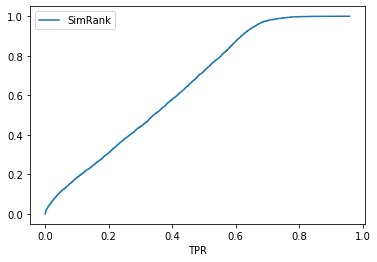

In [47]:
plt.plot(sm_evaluation.fallout(), sm_evaluation.recall(), label="SimRank")

plt.xlabel("FPR")
plt.xlabel("TPR")
plt.legend()
plt.show()

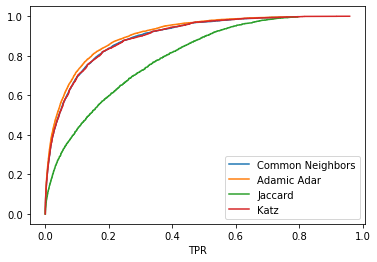

In [48]:
plt.plot(cn_evaluation.fallout(), cn_evaluation.recall(), label="Common Neighbors")
plt.plot(aa_evaluation.fallout(), aa_evaluation.recall(), label="Adamic Adar")
plt.plot(jc_evaluation.fallout(), jc_evaluation.recall(), label="Jaccard")
plt.plot(kz_evaluation.fallout(), kz_evaluation.recall(), label="Katz")


plt.xlabel("FPR")
plt.xlabel("TPR")
plt.legend()
plt.show()

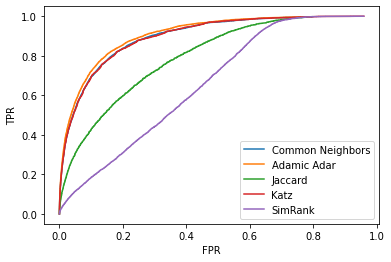

In [10]:
plt.plot(cn_evaluation.fallout(), cn_evaluation.recall(), label="Common Neighbors")
plt.plot(aa_evaluation.fallout(), aa_evaluation.recall(), label="Adamic Adar")
plt.plot(jc_evaluation.fallout(), jc_evaluation.recall(), label="Jaccard")
plt.plot(kz_evaluation.fallout(), kz_evaluation.recall(), label="Katz")
plt.plot(sm_evaluation.fallout(), sm_evaluation.recall(), label="SimRank")


plt.xlabel("FPR")
plt.ylabel("TPR")
plt.legend()
plt.show()

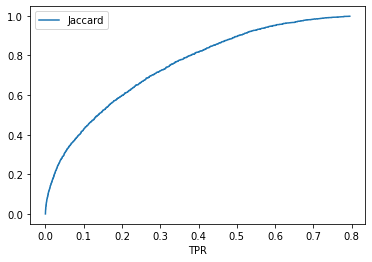

In [11]:
plt.plot(jc_evaluation.fallout(), jc_evaluation.recall(), label="Jaccard")


plt.xlabel("FPR")
plt.xlabel("TPR")
plt.legend()
plt.show()

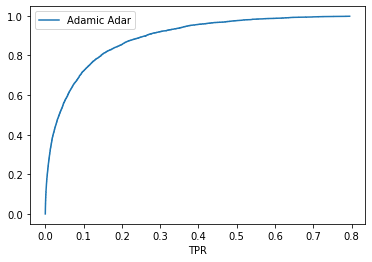

In [49]:
plt.plot(aa_evaluation.fallout(), aa_evaluation.recall(), label="Adamic Adar")


plt.xlabel("FPR")
plt.xlabel("TPR")
plt.legend()
plt.show()

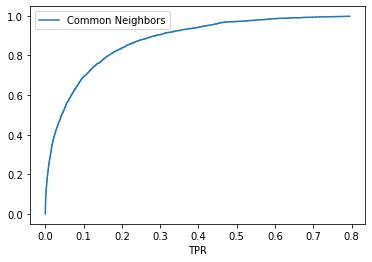

In [50]:
plt.plot(cn_evaluation.fallout(), cn_evaluation.recall(), label="Common Neighbors")
plt.xlabel("FPR")
plt.xlabel("TPR")
plt.legend()
plt.show()

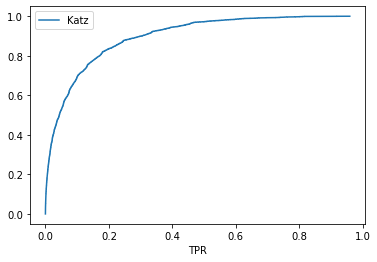

In [12]:
plt.plot(kz_evaluation.fallout(), kz_evaluation.recall(), label="Katz")


plt.xlabel("FPR")
plt.xlabel("TPR")
plt.legend()
plt.show()

In [16]:
sm_evaluation.data 

array([[0.00000e+00, 1.00000e+00, 5.66000e+03, 5.52435e+05],
       [1.00000e+00, 1.00000e+00, 5.65900e+03, 5.52435e+05],
       [2.00000e+00, 1.00000e+00, 5.65800e+03, 5.52435e+05],
       ...,
       [5.66000e+03, 5.29793e+05, 0.00000e+00, 2.26430e+04],
       [5.66000e+03, 5.29794e+05, 0.00000e+00, 2.26420e+04],
       [5.66000e+03, 5.29795e+05, 0.00000e+00, 2.26410e+04]])

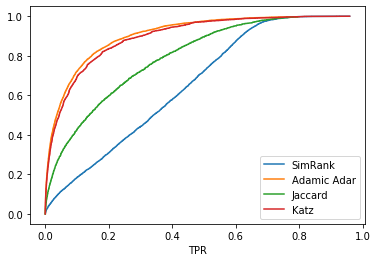

In [51]:
plt.plot(sm_evaluation.fallout(), sm_evaluation.recall(), label="SimRank")
plt.plot(aa_evaluation.fallout(), aa_evaluation.recall(), label="Adamic Adar")
plt.plot(jc_evaluation.fallout(), jc_evaluation.recall(), label="Jaccard")
plt.plot(kz_evaluation.fallout(), kz_evaluation.recall(), label="Katz")


plt.xlabel("FPR")
plt.xlabel("TPR")
plt.legend()
plt.show()

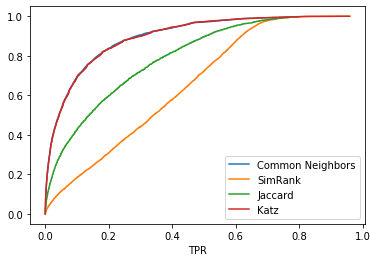

In [52]:
plt.plot(cn_evaluation.fallout(), cn_evaluation.recall(), label="Common Neighbors")
plt.plot(sm_evaluation.fallout(), sm_evaluation.recall(), label="SimRank")
plt.plot(jc_evaluation.fallout(), jc_evaluation.recall(), label="Jaccard")
plt.plot(kz_evaluation.fallout(), kz_evaluation.recall(), label="Katz")


plt.xlabel("FPR")
plt.xlabel("TPR")
plt.legend()
plt.show()

In [53]:
from sklearn.metrics import auc

print("Area Under Roc Curve (AUROC)")
print(f"Common Neigh.: \t {auc(cn_evaluation.fallout(), cn_evaluation.recall())}")
print(f"Adamic Adar: \t {auc(aa_evaluation.fallout(), aa_evaluation.recall())}")
print(f"Jaccard: \t {auc(jc_evaluation.fallout(), jc_evaluation.recall())}")
print(f"SimRank: \t {auc(sm_evaluation.fallout(), sm_evaluation.recall())}")
print(f"Katz:\t \t {auc(kz_evaluation.fallout(), kz_evaluation.recall())}")

Area Under Roc Curve (AUROC)
Common Neigh.: 	 0.694369699720201
Adamic Adar: 	 0.7043014016403851
Jaccard: 	 0.5933002139550397
SimRank: 	 0.6205723118859848
Katz:	 	 0.8574914045333216


In [54]:
preds = list(nx.preferential_attachment(training,universe))
pref_results=[]
for u, v, p in preds:
    #print('(%s, %s) -> %d' % (u, v, p))
    pref_results.append([u,v,p])
pref_results=sorted(pref_results,key=lambda x: x[2],reverse=True)
pref_results

[['python', 'javascript', 276640],
 ['python', 'java', 235676],
 ['javascript', 'java', 230360],
 ['python', 'c#', 190988],
 ['python', 'node.js', 188328],
 ['python', 'android', 187796],
 ['javascript', 'c#', 186680],
 ['node.js', 'javascript', 184080],
 ['javascript', 'android', 183560],
 ['reactjs', 'python', 168644],
 ['reactjs', 'javascript', 164840],
 ['python-3.x', 'python', 162792],
 ['python-3.x', 'javascript', 159120],
 ['python', 'c++', 159068],
 ['java', 'c#', 159037],
 ['node.js', 'java', 156822],
 ['java', 'android', 156379],
 ['javascript', 'c++', 155480],
 ['typescript', 'python', 148960],
 ['python', 'docker', 147364],
 ['typescript', 'javascript', 145600],
 ['python', 'flutter', 144704],
 ['javascript', 'docker', 144040],
 ['javascript', 'flutter', 141440],
 ['reactjs', 'java', 140431],
 ['python-3.x', 'java', 135558],
 ['python', 'angular', 133532],
 ['java', 'c++', 132457],
 ['javascript', 'angular', 130520],
 ['python', 'html', 127148],
 ['node.js', 'c#', 127086],


In [55]:
def intersect(result_1, result_2, dim, name):
    print(f"{name}")
    int_1_2=[]
    count=0
    for item_1 in result_1[:300]:
        for item_2 in result_2[:300]:
            if item_1[0]==item_2[0]:
                print('intersezione:',item_1[0])
                int_1_2.append(item_1[0])
                count+=1
    print(count)
    return int_1_2

In [56]:
def intersection(lst1, lst2): 
    lst3 = [value for value in lst1 if value in lst2] 
    return lst3 

In [57]:
aa_cn = intersect(aa_results, cn_results, 300, "AA vs CN")
aa_jc = intersect(aa_results, jc_results, 300, "AA vs JC")
aa_kz = intersect(aa_results, kz_results, 300, "AA vs KZ")
aa_sm = intersect(aa_results, sm_results, 300, "AA vs SM")


AA vs CN
intersezione: import - github-actions
intersezione: import - dask
intersezione: import - database-migration
intersezione: travis-ci - import
intersezione: import - google-apps-script
intersezione: import - frameworks
intersezione: import - identityserver4
intersezione: import - google-oauth
intersezione: import - conda
intersezione: import - android-webview
intersezione: import - composer-php
intersezione: in-app-purchase - import
intersezione: math - import
intersezione: input - import
intersezione: import - docker-compose
intersezione: sequence - import
intersezione: import - constexpr
intersezione: import - azure-functions
intersezione: retrofit2 - import
intersezione: lazy-loading - import
intersezione: lambda - import
intersezione: oauth - import
intersezione: import - alpine
intersezione: navigation - import
intersezione: jupyter-notebook - import
intersezione: text - import
intersezione: import - google-play-console
intersezione: kotlin-coroutines - import
intersezione:

In [58]:
cn_jc = intersect(cn_results, jc_results, 300, "CN vs JC")
cn_kz = intersect(cn_results, kz_results, 300, "CN vs KZ")
cn_sm = intersect(cn_results, sm_results, 300, "CN vs SM")

CN vs JC
intersezione: import - github-actions
intersezione: import - dask
intersezione: import - database-migration
intersezione: travis-ci - import
intersezione: import - google-apps-script
intersezione: import - frameworks
intersezione: import - identityserver4
intersezione: import - google-oauth
intersezione: import - conda
intersezione: import - android-webview
intersezione: import - composer-php
intersezione: in-app-purchase - import
intersezione: math - import
intersezione: input - import
intersezione: import - docker-compose
intersezione: sequence - import
intersezione: import - constexpr
intersezione: import - azure-functions
intersezione: retrofit2 - import
intersezione: lazy-loading - import
intersezione: lambda - import
intersezione: oauth - import
intersezione: import - alpine
intersezione: navigation - import
intersezione: jupyter-notebook - import
intersezione: text - import
intersezione: import - google-play-console
intersezione: kotlin-coroutines - import
intersezione:

In [59]:
jc_kz = intersect(jc_results, kz_results, 300, "JC vs KZ")
jc_sm = intersect(jc_results, sm_results, 300, "JC vs SM")

JC vs KZ
intersezione: import - database-migration
intersezione: import - identityserver4
intersezione: in-app-purchase - import
intersezione: import - azure-functions
intersezione: retrofit2 - import
intersezione: navigation - import
intersezione: import - google-play-console
intersezione: kotlin-coroutines - import
intersezione: import - apple-push-notifications
intersezione: import - angular-material
intersezione: import - flutter-test
intersezione: snowflake-cloud-data-platform - import
intersezione: twitter - import
intersezione: import - angular10
intersezione: import - build.gradle
intersezione: import - gradle-kotlin-dsl
intersezione: import - atomic
intersezione: v8 - import
intersezione: ssh-keys - import
intersezione: import - garbage-collection
intersezione: import - huawei-mobile-services
intersezione: spring-data - import
intersezione: import - asp.net-web-api
intersezione: import - delphi
intersezione: import - .net-5
intersezione: nginx - import
intersezione: laravel-7 

intersezione: import - autocomplete
intersezione: import - command-line-interface
intersezione: import - cloudflare
intersezione: import - bootstrap-4
intersezione: tensorboard - import
intersezione: reverse-proxy - import
intersezione: import - airflow
intersezione: import - ecmascript-6
intersezione: qt5 - import
intersezione: typeorm - import
intersezione: mqtt - import
intersezione: time-series - import
intersezione: mocking - import
intersezione: import - comparison
intersezione: unix - import
intersezione: yaml - import
intersezione: import - azure-sql-database
intersezione: import - icons
intersezione: ionic-framework - import
intersezione: soap - import
intersezione: import - cryptography
intersezione: import - axios
intersezione: import - clang
intersezione: ssis - import
intersezione: import - file
intersezione: import - iframe
intersezione: web-scraping - import
intersezione: split - import
intersezione: validation - import
intersezione: import - entity-framework
intersezion

In [60]:
kz_sm = intersect(kz_results, sm_results, 300, "KZ vs SM")

KZ vs SM
intersezione: import - identityserver4
intersezione: import - centos
intersezione: import - aws-serverless
intersezione: ios-simulator - import
intersezione: import - cloudflare
intersezione: import - amazon-elastic-beanstalk
intersezione: join - import
intersezione: import - base64
intersezione: import - crashlytics
intersezione: service-accounts - import
intersezione: spring-data - import
intersezione: import - huawei-mobile-services
intersezione: import - atomic
intersezione: import - apple-push-notifications
intersezione: kotlin-coroutines - import
intersezione: import - google-play-console
intersezione: import - android-layout
intersezione: synchronization - import
intersezione: token - import
intersezione: vpn - import
intersezione: virtual-machine - import
intersezione: prolog - import
intersezione: import - android-jetpack
intersezione: retrofit2 - import
intersezione: in-app-purchase - import
intersezione: zsh - import
intersezione: service - import
intersezione: impo

In [61]:
# All intersection
int_m=intersection(cn_jc,kz_sm)
int_final=intersection(int_m,aa_sm)

In [62]:
len(int_final)

82

In [63]:
int_final

[Pair('import', 'database-migration'),
 Pair('import', 'identityserver4'),
 Pair('in-app-purchase', 'import'),
 Pair('import', 'azure-functions'),
 Pair('retrofit2', 'import'),
 Pair('navigation', 'import'),
 Pair('import', 'google-play-console'),
 Pair('kotlin-coroutines', 'import'),
 Pair('import', 'apple-push-notifications'),
 Pair('import', 'angular-material'),
 Pair('import', 'flutter-test'),
 Pair('snowflake-cloud-data-platform', 'import'),
 Pair('twitter', 'import'),
 Pair('import', 'angular10'),
 Pair('import', 'build.gradle'),
 Pair('import', 'gradle-kotlin-dsl'),
 Pair('import', 'atomic'),
 Pair('v8', 'import'),
 Pair('ssh-keys', 'import'),
 Pair('import', 'garbage-collection'),
 Pair('import', 'huawei-mobile-services'),
 Pair('spring-data', 'import'),
 Pair('import', 'asp.net-web-api'),
 Pair('import', 'delphi'),
 Pair('import', '.net-5'),
 Pair('nginx', 'import'),
 Pair('laravel-7', 'import'),
 Pair('service', 'import'),
 Pair('import', 'android-jetpack'),
 Pair('push-notif